<a href="https://colab.research.google.com/github/WMFrts/regressao/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center>REGRESSÃO</center></h3>
<p align="Justify">É uma técnica que permite quantificar e inferir a relação de uma variável dependente (variável de resposta, objetivo) com variáveis independentes (variáveis explicativas, previsoras). A análise da regressão pode ser usada como um método descritivo da análise de dados (por exemplo, o ajustamento de curvas).</p>
<hr size="1" width="100%" align="center" noshade>




**REGRESSÃO LINEAR SIMPLES**
<p align="Justify">Inclui somente duas variáveis: uma independente e outra dependente. 
A variável dependente é aquela que está sendo explicada, 
enquanto a variável independente é aquela que é utilizada 
para explicar a variação na variável dependente.</p>


In [3]:

#biblioteca plotly para visualização de gráficos dinâmicos:

!pip install plotly --upgrade


In [4]:

#plotly,seaborn e matplotlib para gerar e visualizar gráficos;
#pandas parar carregar o arquivo .csv;
#numpy para realizar os cálculos em Arrays Multidimensionais.

import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**BASE PLANO DE SAÚDE** 
<p align="Justify">Base de dados ilustrativa para estudo de regressão linear simples com 10 registros. Mostra na primeira coluna a idade; já na segunda, o custo.</p>

In [5]:

#Carregamento do arquivo

base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


**PERGUNTA SOBRE O CONTEXTO**
<p align="Justify">De acordo com os dados apresentados, quanto poderia custar o plano 
saúde dependendo da idade da pessoa?

Essa pergunta pode ser respondida por meio de um modelo de regressão
linear simples, pois há apenas duas variáveis: a dependente (custo) e a 
independente, previsora (idade)</p>


In [6]:
#criação da variável x que armazenará o atributo previsor (idade)
#iloc[:,0] seleciona o conj. de registros de todas as linhas da coluna 0
#.values converte para o formato np array

x_plano_saude = base_plano_saude.iloc[:, 0].values 
x_plano_saude


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [7]:
#mesmo procedimento para a variável y dependente (custo)
y_plano_saude = base_plano_saude.iloc[:, 1].values 
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

**COEFICIENTE DE CORRELAÇÃO**
<p align="Justify">O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. 

Apresenta um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável.</P>

In [8]:
# A correlação entre as duas variáveis é 0.93091958
# 93% do custo talvez seja explicado pela idade 

np.corrcoef(x_plano_saude, y_plano_saude)


array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [9]:
# Esta em forma de vetor, precisa mudar para matriz

x_plano_saude.shape

(10,)

In [12]:
# .reshape() para mudar para forma de matriz
# Então, poderá ser enviada para o algoritmo de regressão

x_plano_saude = x_plano_saude.reshape(-1,1)
x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [13]:
# importação para o algoritmo
# função fit() para executar o treinamento

from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)


LinearRegression()

In [14]:
# y = b0 + b1.x, equação que representa o modelo
# treinamento = encontrar b0 e b1 para cada atributo

# b0 = intercept (intersecção com o eixo y)
regressor_plano_saude.intercept_

-558.9490909090912

In [15]:
# b = coeficiente (inclinação da reta)
regressor_plano_saude.coef_

array([61.86787879])

In [16]:
# método predict para descobrir a associação 
# x_plano_saude está relacionado as idades

previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
# gráfico de dispersão para visualizar o resultado
grafico = px.scatter(x = x_plano_saude, y= y_plano_saude)
grafico.show()

In [17]:
# antes, x_plano_saude está em formato de matriz 

x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [18]:
# para fazer o gráfico, precisa retornar para o formato de vetor
# para isso, utiliza a função .ravel do np

x_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [19]:
# Novamente,  o código para mostrar o gráfico
# Aqui, mostra apenas os pontos idade e custo

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.show()

In [20]:
# Agora, com as previsões do algoritmo
# acrescentam-se as previsões com a função .add_scatter

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.add_scatter(x = x_plano_saude.ravel(), y= previsoes, name = 'Regressão')
grafico.show()

In [21]:
# para saber a qualidade do algoritmo
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

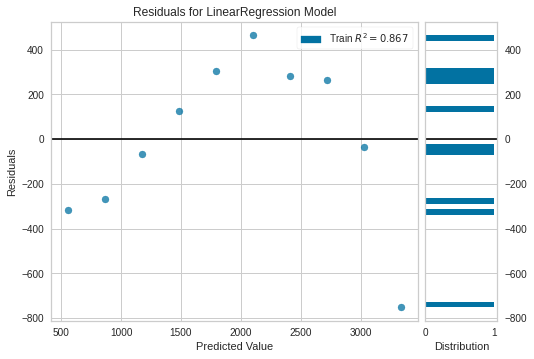

In [24]:
# para saber a distância dos valores reais em relção à regressão linear
# Train R² = 0.867 indica a qualidade do algoritmo

from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()
